# Examine effect on VAA of all pitches if mound is lowered
1. Calculate `VAA` using Alex [Chamberlain's formula](https://blogs.fangraphs.com/a-visualized-primer-on-vertical-approach-angle-vaa/)
1. Substitute one of the variables with vertical distance `d`, to get new formula, using [Kinematic Equations](https://www.physicsclassroom.com/class/1DKin/Lesson-6/Kinematic-Equations-and-Free-Fall)
1. Calculate `VAA_new` using new formula (`VAA_new` should be similar to `VAA`)
1. Calculate `VAA_lowered` by lowering `d` to certain height (i.e. 5")

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math


pd.set_option('display.max_columns', None)

In [2]:
raw_data = pd.read_csv('data/PitchData_21.csv')
raw_data.drop(columns=raw_data.columns[0], inplace=True)

In [3]:
data = raw_data.copy()
# keep regular season games
data = data[data['game_type']=='R'].copy()

In [4]:
data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
10786,FF,2021-10-03,92.3,1.40,6.80,"Smith, Will",596019,519293,field_out,hit_into_play,NaN,NaN,NaN,NaN,1.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,X,5.0,ground_ball,1,2,2021,0.69,1.38,-0.69,2.83,NaN,NaN,NaN,2,9,Top,77.54,155.31,NaN,NaN,518595.0,NaN,NaN,-6.833043,-134.166485,-7.361843,9.708393,26.562803,-14.083224,3.32,1.51,13.0,95.2,-13.0,92.8,2330.0,6.5,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.03,0.174,0.158,0.0,1.0,0.0,0.0,2.0,61,4,4-Seam Fastball,5,0,0,5,0,5,0,5,Infield shift,Strategic,148.0,0.000,-0.073
10787,SL,2021-10-03,80.6,1.60,6.64,"Smith, Will",596019,519293,NaN,foul,NaN,NaN,NaN,NaN,4.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,S,NaN,NaN,1,1,2021,-0.77,0.48,-0.71,2.62,NaN,NaN,NaN,2,9,Top,NaN,NaN,NaN,NaN,518595.0,NaN,NaN,-3.700232,-117.430885,-3.266842,-6.531123,19.793390,-27.369114,3.32,1.51,108.0,75.3,75.0,81.2,2254.0,6.4,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,3,Slider,5,0,0,5,0,5,0,5,Infield shift,Strategic,315.0,0.000,-0.027
10788,CU,2021-10-03,75.5,1.46,6.88,"Smith, Will",596019,519293,NaN,foul,NaN,NaN,NaN,NaN,5.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,S,NaN,NaN,1,0,2021,-0.65,-0.51,-0.04,2.46,NaN,NaN,NaN,2,9,Top,NaN,NaN,NaN,NaN,518595.0,NaN,NaN,-1.977183,-109.901781,-1.155694,-4.872924,20.602334,-36.262184,3.32,1.51,157.0,83.5,65.0,75.2,1940.0,6.2,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,2,Curveball,5,0,0,5,0,5,0,5,Infield shift,Standard,328.0,0.000,-0.020
10789,CU,2021-10-03,75.0,1.53,6.83,"Smith, Will",596019,519293,NaN,ball,NaN,NaN,NaN,NaN,12.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,B,NaN,NaN,0,0,2021,-0.69,-0.69,2.10,3.89,NaN,NaN,NaN,2,9,Top,NaN,NaN,NaN,NaN,518595.0,NaN,NaN,2.375830,-109.205830,2.277617,-5.902656,19.427562,-38.284747,3.31,1.48,NaN,NaN,NaN,74.5,2017.0,5.9,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,1,Curveball,5,0,0,5,0,5,0,5,Standard,Standard,330.0,0.000,0.016
10790,FF,2021-10-03,91.2,1.49,6.66,"Smith, Will",607043,519293,field_out,hit_into_play,NaN,NaN,NaN,NaN,4.0,"Brandon Nimmo grounds out, second baseman Ozzi...",R,L,L,ATL,NYM,X,4.0,ground_ball,1,0,2021,0.63,1.28,-0.31,2.80,NaN,NaN,NaN,1,9,Top,144.83,145.72,NaN,NaN,518595.0,NaN,NaN,-5.868477,-132.500539,-6.486796,8.700586,30.117690,-15.941174,3.49,1.60,9.0,93.3,-18.0,90.9,2281.0,6.3,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.15,0.100,0.090,0.0,1.0,0.0,0.0,2.0,60,2,4-Seam Fastball,5,0,0,5,0,5,0,5,Standard,Standard,143.0,0.002,-0.189


# Remove all rows with missing formula variables

In [5]:
data.shape

(709851, 92)

In [6]:
data = data[data['vy0'].notna()].copy()
data = data[data['ay'].notna()].copy()
data = data[data['vz0'].notna()].copy()
data = data[data['az'].notna()].copy()

In [7]:
data.shape

(709483, 92)

# Calculate VAA

VAA Formula: https://blogs.fangraphs.com/a-visualized-primer-on-vertical-approach-angle-vaa/

In [8]:
data['y0'] = 50
data['yf'] = 17/12

In [9]:
data['vy_f'] = -(data['vy0']**(2)-((data['y0']-data['yf'])*2*data['ay']))**(1/2)

In [10]:
data['t'] = (data['vy_f']-data['vy0'])/data['ay']

In [11]:
data['vz_f'] = data['vz0'] + (data['az']*data['t'])

In [12]:
data['VAA'] = -np.arctan(data['vz_f']/data['vy_f']) * (180/math.pi)

# Construct new formula and calculate VAA_new with height information
Substituting `vz0` (initial downward speed) by `d` (distance between release height and final height)

Formula: `vz0`=`d`/`t` - 0.5 * `a` * `t`

In [ ]:
data['d'] = data['release_pos_z'] - data['plate_z']

In [14]:
data['vz0_new'] = -(data['d']/data['t'] + data['az']*data['t']*0.5)

In [15]:
data['d_implied'] = -data['vz0']*data['t'] - 0.5*data['az']*(data['t']**2)

In [16]:
data['vz_f_new'] = data['vz0_new'] + (data['az']*data['t'])

In [17]:
data['VAA_new'] = -np.arctan(data['vz_f_new']/data['vy_f']) * (180/math.pi)

# Calculate VAA_lowered with lowered mound

In [18]:
# lower the mound height by feet
low_amount = 5/12

In [19]:
data['d_lowered'] = data['d']-low_amount

In [20]:
data['vz0_lowered'] = -(data['d_lowered']/data['t'] + data['az']*data['t']*0.5)

In [21]:
data['vz_f_lowered'] = data['vz0_lowered'] + (data['az']*data['t'])

In [22]:
data['VAA_lowered'] = -np.arctan(data['vz_f_lowered']/data['vy_f']) * (180/math.pi)

In [23]:
data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,y0,yf,vy_f,t,vz_f,VAA,d,vz0_new,d_implied,vz_f_new,VAA_new,d_lowered,vz0_lowered,vz_f_lowered,VAA_lowered
10786,FF,2021-10-03,92.3,1.40,6.80,"Smith, Will",596019,519293,field_out,hit_into_play,NaN,NaN,NaN,NaN,1.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,X,5.0,ground_ball,1,2,2021,0.69,1.38,-0.69,2.83,NaN,NaN,NaN,2,9,Top,77.54,155.31,NaN,NaN,518595.0,NaN,NaN,-6.833043,-134.166485,-7.361843,9.708393,26.562803,-14.083224,3.32,1.51,13.0,95.2,-13.0,92.8,2330.0,6.5,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.03,0.174,0.158,0.0,1.0,0.0,0.0,2.0,61,4,4-Seam Fastball,5,0,0,5,0,5,0,5,Infield shift,Strategic,148.0,0.000,-0.073,50,1.416667,-124.175789,0.376116,-12.658769,-5.820757,3.97,-7.906791,3.765037,-13.203717,-6.069503,3.553333,-6.798976,-12.095903,-5.563601
10787,SL,2021-10-03,80.6,1.60,6.64,"Smith, Will",596019,519293,NaN,foul,NaN,NaN,NaN,NaN,4.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,S,NaN,NaN,1,1,2021,-0.77,0.48,-0.71,2.62,NaN,NaN,NaN,2,9,Top,NaN,NaN,NaN,NaN,518595.0,NaN,NaN,-3.700232,-117.430885,-3.266842,-6.531123,19.793390,-27.369114,3.32,1.51,108.0,75.3,75.0,81.2,2254.0,6.4,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,3,Slider,5,0,0,5,0,5,0,5,Infield shift,Strategic,315.0,0.000,-0.027,50,1.416667,-108.934636,0.429247,-15.014946,-7.847883,4.02,-3.491191,3.923699,-15.239294,-7.963650,3.603333,-2.520498,-14.268602,-7.462299
10788,CU,2021-10-03,75.5,1.46,6.88,"Smith, Will",596019,519293,NaN,foul,NaN,NaN,NaN,NaN,5.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,S,NaN,NaN,1,0,2021,-0.65,-0.51,-0.04,2.46,NaN,NaN,NaN,2,9,Top,NaN,NaN,NaN,NaN,518595.0,NaN,NaN,-1.977183,-109.901781,-1.155694,-4.872924,20.602334,-36.262184,3.32,1.51,157.0,83.5,65.0,75.2,1940.0,6.2,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,2,Curveball,5,0,0,5,0,5,0,5,Infield shift,Standard,328.0,0.000,-0.020,50,1.416667,-100.381977,0.462074,-17.911509,-10.117014,4.42,-1.187659,4.405230,-17.943474,-10.134694,4.003333,-0.285928,-17.041742,-9.635178
10789,CU,2021-10-03,75.0,1.53,6.83,"Smith, Will",596019,519293,NaN,ball,NaN,NaN,NaN,NaN,12.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,B,NaN,NaN,0,0,2021,-0.69,-0.69,2.10,3.89,NaN,NaN,NaN,2,9,Top,NaN,NaN,NaN,NaN,518595.0,NaN,NaN,2.375830,-109.205830,2.277617,-5.902656,19.427562,-38.284747,3.31,1.48,NaN,NaN,NaN,74.5,2017.0,5.9,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,1,Curveball,5,0,0,5,0,5,0,5,Standard,Standard,330.0,0.000,0.016,50,1.416667,-100.190827,0.464032,-15.487715,-8.787353,2.94,2.546891,3.064951,-15.218442,-8.636898,2.523333,3.444818,-14.320514,-8.134327
10790,FF,2021-10-03,91.2,1.49,6.66,"Smith, Will",607043,519293,field_out,hit_

# Drop observations < -14 to aid visualization

In [24]:
data_dropped = data[(data['VAA_new']>=-14)&(data['VAA_new']<=0)].copy()

# Compare `VAA` and `VAA_new`

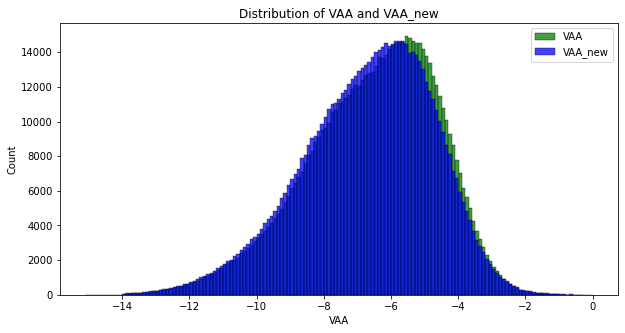

In [25]:
fig, ax = plt.subplots(figsize=[10,5])
sns.histplot(data=data_dropped, x='VAA', binwidth=0.1, color='g')
sns.histplot(data=data_dropped, x='VAA_new', color='b', binwidth=0.1)
plt.title('Distribution of VAA and VAA_new')
plt.legend(['VAA', 'VAA_new'])
plt.show()

Mean Absolute Change in degrees:

In [26]:
sum(abs(data_dropped['VAA'] - data_dropped['VAA_new']))/data_dropped.shape[0]

0.16169876192870303

Mean Percent Change:

In [27]:
abs((data_dropped['VAA'] - data_dropped['VAA_new'])/data_dropped['VAA']).mean()

0.026491663982576335

Change is not significant

# Compare `VAA_new` and `VAA_lowered`

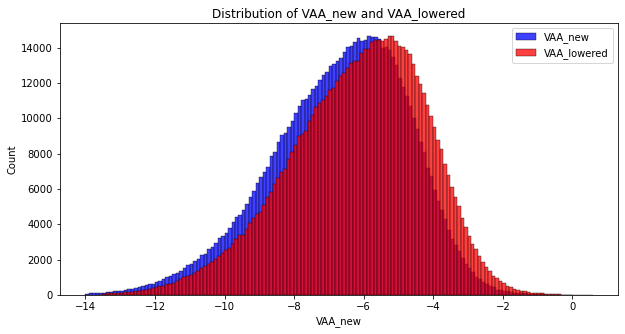

In [28]:
fig, ax = plt.subplots(figsize=[10,5])
sns.histplot(data=data_dropped, x='VAA_new', binwidth=0.1, color='b')
sns.histplot(data=data_dropped, x='VAA_lowered', color='r', binwidth=0.1)
plt.title('Distribution of VAA_new and VAA_lowered')
plt.legend(['VAA_new', 'VAA_lowered'])
plt.show()

Mean Absolute Change in degrees:

In [29]:
sum(abs(data_dropped['VAA_new'] - data_dropped['VAA_lowered']))/data_dropped.shape[0]

0.5058798923696393

Mean Percentage Change:

In [30]:
abs((data_dropped['VAA_new'] - data_dropped['VAA_lowered'])/data_dropped['VAA_new']).mean()

0.08434769800438559

Change is pretty significant

# Plot changes between pitches

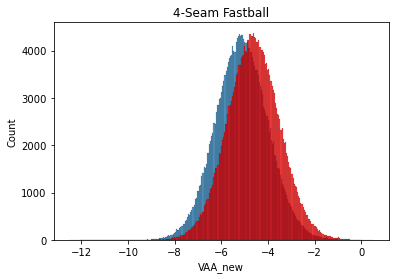

In [31]:
fig, ax = plt.subplots()
sns.histplot(data=data_dropped[data_dropped['pitch_type']=='FF'], x='VAA_new')
sns.histplot(data=data_dropped[data_dropped['pitch_type']=='FF'], x='VAA_lowered', color='r')
plt.title('4-Seam Fastball')
plt.show()

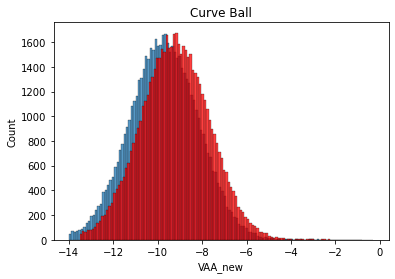

In [32]:
fig, ax = plt.subplots()
sns.histplot(data=data_dropped[data_dropped['pitch_type']=='CU'], x='VAA_new')
sns.histplot(data=data_dropped[data_dropped['pitch_type']=='CU'], x='VAA_lowered', color='r')
plt.title('Curve Ball')
plt.show()

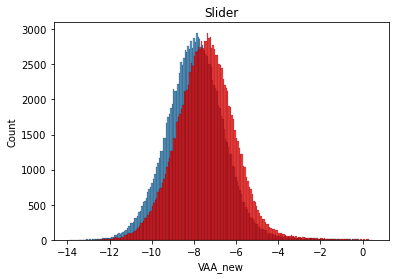

In [33]:
fig, ax = plt.subplots()
sns.histplot(data=data_dropped[data_dropped['pitch_type']=='SL'], x='VAA_new')
sns.histplot(data=data_dropped[data_dropped['pitch_type']=='SL'], x='VAA_lowered', color='r')
plt.title('Slider')
plt.show()

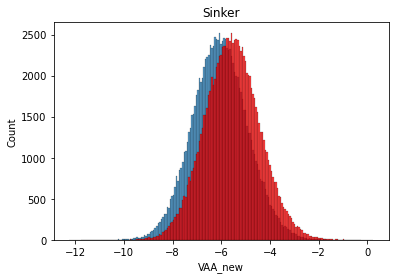

In [34]:
fig, ax = plt.subplots()
sns.histplot(data=data_dropped[data_dropped['pitch_type']=='SI'], x='VAA_new')
sns.histplot(data=data_dropped[data_dropped['pitch_type']=='SI'], x='VAA_lowered', color='r')
plt.title('Sinker')
plt.show()

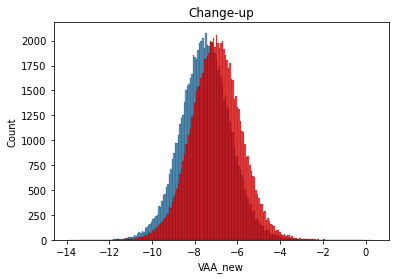

In [35]:
fig, ax = plt.subplots()
sns.histplot(data=data_dropped[data_dropped['pitch_type']=='CH'], x='VAA_new')
sns.histplot(data=data_dropped[data_dropped['pitch_type']=='CH'], x='VAA_lowered', color='r')
plt.title('Change-up')
plt.show()

# Examine effect of hitting outcome after change

## label pitch based on strike zone zone

In [36]:
# define mid point
data_dropped['midPoint'] = (data_dropped['sz_top']-data_dropped['sz_bot'])/2 + data_dropped['sz_bot']

In [37]:
data_dropped['z_label'] = 'top_half'
data_dropped.loc[data_dropped['plate_z']<data_dropped['midPoint'], 'z_label'] = 'bottom_half'

## fastball

In [38]:
pitch_type = 'FF'

In [39]:
q3, q2, q1 = np.percentile(data_dropped[data_dropped['pitch_type']==pitch_type]['VAA_new'], [75, 50,25])
iqr = q3 - q1
iqr

1.4951076060461999

In [40]:
# label fast ball VAA zone
data_pitch = data_dropped[data_dropped['pitch_type']==pitch_type].copy()
data_pitch.loc[(data_pitch['VAA_new']<q1), 'VAA_label'] = 'steep'
data_pitch.loc[(data_pitch['VAA_new']>=q1)&(data_pitch['VAA_new']<q2), 'VAA_label'] = 'less_steep'
data_pitch.loc[(data_pitch['VAA_new']>=q2)&(data_pitch['VAA_new']<q3), 'VAA_label'] = 'less_flat'
data_pitch.loc[(data_pitch['VAA_new']>q3), 'VAA_label'] = 'flat'
data_pitch['count_total'] = 1
data_pitch.loc[data_pitch['description']=='hit_into_play', 'BBE'] = 1
data_pitch.loc[data_pitch['description']!='hit_into_play', 'BBE'] = 0

In [41]:
data_pitch_grouped = data_pitch.groupby(['pitch_name','z_label','VAA_label']).agg({'BBE':sum, 'count_total':sum, 'release_speed':'mean'}).copy()
data_pitch_grouped['BBE_rate'] = data_pitch_grouped['BBE']/data_pitch_grouped['count_total']
data_pitch_grouped

BBE  count_total  release_speed  \
pitch_name      z_label     VAA_label                                         
4-Seam Fastball bottom_half flat          193.0          910      90.067143   
                            less_flat    1347.0         7401      94.759249   
                            less_steep   6409.0        30831      94.211895   
                            steep        8756.0        57508      93.426804   
                top_half    flat         4777.0        61723      94.047116   
                            less_flat   10010.0        55232      93.753410   
                            less_steep   7698.0        31801      93.085710   
                            steep        1414.0         5125      91.841307   

                                        BBE_rate  
pitch_name      z_label     VAA_label             
4-Seam Fastball bottom_half flat        0.212088  
                            less_flat   0.182002  
                            less_steep  0.207875  
                            steep       0.152257  
                top_half    flat        0.077394  
                            less_flat   0.181236  
                            less_steep  0.242068  
                            steep       0.275902

## Curve

In [42]:
pitch_type = 'CU'

In [43]:
q3, q2, q1 = np.percentile(data_dropped[data_dropped['pitch_type']==pitch_type]['VAA_new'], [75, 50,25])
iqr = q3 - q1
iqr

2.0880711241775565

In [44]:
# label fast ball VAA zone
data_pitch = data_dropped[data_dropped['pitch_type']==pitch_type].copy()
data_pitch.loc[(data_pitch['VAA_new']<q1), 'VAA_label'] = 'steep'
data_pitch.loc[(data_pitch['VAA_new']>=q1)&(data_pitch['VAA_new']<q2), 'VAA_label'] = 'less_steep'
data_pitch.loc[(data_pitch['VAA_new']>=q2)&(data_pitch['VAA_new']<q3), 'VAA_label'] = 'less_flat'
data_pitch.loc[(data_pitch['VAA_new']>q3), 'VAA_label'] = 'flat'
data_pitch['count_total'] = 1
data_pitch.loc[data_pitch['description']=='hit_into_play', 'BBE'] = 1
data_pitch.loc[data_pitch['description']!='hit_into_play', 'BBE'] = 0

In [45]:
data_pitch_grouped = data_pitch.groupby(['pitch_name','z_label','VAA_label']).agg({'BBE':sum, 'count_total':sum, 'release_speed':'mean'}).copy()
data_pitch_grouped['BBE_rate'] = data_pitch_grouped['BBE']/data_pitch_grouped['count_total']
data_pitch_grouped

BBE  count_total  release_speed  \
pitch_name z_label     VAA_label                                        
Curveball  bottom_half flat        1156.0         5357      80.876251   
                       less_flat   2045.0        10032      80.188974   
                       less_steep  2075.0        12864      79.063837   
                       steep        997.0        14513      77.608868   
           top_half    flat        1059.0         9306      79.401365   
                       less_flat    773.0         4630      76.957883   
                       less_steep   340.0         1798      73.733482   
                       steep         17.0          150      69.458667   

                                   BBE_rate  
pitch_name z_label     VAA_label             
Curveball  bottom_half flat        0.215792  
                       less_flat   0.203848  
                       less_steep  0.161303  
                       steep       0.068697  
           top_half    flat        0.113798  
                       less_flat   0.166955  
                       less_steep  0.189099  
                       steep       0.113333

## slider

In [46]:
pitch_type = 'SL'

In [47]:
q3, q2, q1 = np.percentile(data_dropped[data_dropped['pitch_type']==pitch_type]['VAA_new'], [75, 50,25])
iqr = q3 - q1
iqr

1.7709204735182134

In [48]:
# label fast ball VAA zone
data_pitch = data_dropped[data_dropped['pitch_type']==pitch_type].copy()
data_pitch.loc[(data_pitch['VAA_new']<q1), 'VAA_label'] = 'steep'
data_pitch.loc[(data_pitch['VAA_new']>=q1)&(data_pitch['VAA_new']<q2), 'VAA_label'] = 'less_steep'
data_pitch.loc[(data_pitch['VAA_new']>=q2)&(data_pitch['VAA_new']<q3), 'VAA_label'] = 'less_flat'
data_pitch.loc[(data_pitch['VAA_new']>q3), 'VAA_label'] = 'flat'
data_pitch['count_total'] = 1
data_pitch.loc[data_pitch['description']=='hit_into_play', 'BBE'] = 1
data_pitch.loc[data_pitch['description']!='hit_into_play', 'BBE'] = 0

In [49]:
data_pitch_grouped = data_pitch.groupby(['pitch_name','z_label','VAA_label']).agg({'BBE':sum, 'count_total':sum, 'release_speed':'mean'}).copy()
data_pitch_grouped['BBE_rate'] = data_pitch_grouped['BBE']/data_pitch_grouped['count_total']
data_pitch_grouped

BBE  count_total  release_speed  \
pitch_name z_label     VAA_label                                        
Slider     bottom_half flat        2542.0        10457      85.372265   
                       less_flat   5655.0        25097      85.516010   
                       less_steep  5333.0        31807      84.818773   
                       steep       2291.0        33828      84.046090   
           top_half    flat        3391.0        23548      84.864417   
                       less_flat   1901.0         8908      83.466341   
                       less_steep   478.0         2198      81.716924   
                       steep         45.0          177      76.612994   

                                   BBE_rate  
pitch_name z_label     VAA_label             
Slider     bottom_half flat        0.243091  
                       less_flat   0.225326  
                       less_steep  0.167667  
                       steep       0.067725  
           top_half    flat        0.144004  
                       less_flat   0.213404  
                       less_steep  0.217470  
                       steep       0.254237

# Conclusion:
By modifying Alex Chamberlain's VAA formual, we can definiately model the VAA change due to lowered mound. However, by bucketing existing pitches based on high vs. low VAA, we are simply seperating pitches that came in faster and higher vs. slower and lower. We couldn't draw a concrete conclusion based on this exploratory analysis. More analysis needs to be done by modeling the effect of pitch speed, exact location, pitch type, etc.